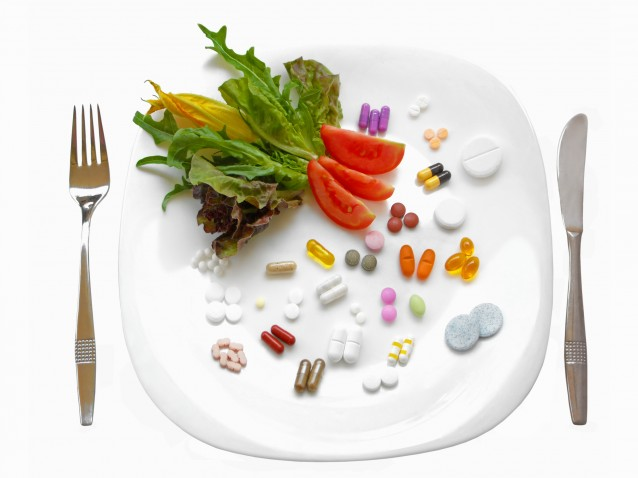

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**MICROSOFT MENTEE ENGAGE PROGRAM'22**

#**DIET RECOMMENDATION SYSTEM**

##**NAME : G. HARINISRI** 

PROPOSED IDEA :

The goal of application is to provide a platform where users find their Nutritious food according to their personal health preferences according to their BMI and recommend food separately for weight loss and gain categories  and build a behavior of living healthy life and I have  also build the recommendation system wherein it helps to  identify the suitable drug names that can be recommended for the diseases respectively.


###IMPORTING THE REQUIRED LIBRARIES AND PACKAGES

In [ ]:
!pip install django
import pandas as pd
import numpy as np
!pip install BeautifulSoup
from bs4 import BeautifulSoup
import requests
import warnings
import time
import seaborn as sns
import matplotlib.pyplot as plt
import random
import datetime
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import re 
import sklearn
from sklearn.neighbors import NearestNeighbors
from collections import Counter
!pip install lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from joblib import dump
!pip3 install catboost
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
import lightgbm
from catboost import CatBoostClassifier
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**FOR PERSONALIZED MEAL AND DIET RECOMMENDATION**        
**flow of project:**   
Data collection - data is collected by web scraping (projects works on demo data).        
Data processing - data is processed and required attributes are added to make demo datasets.       
User's profile generation by taking input from them .         
Initial recommendation on the basis of user's profile (Content-based,implemented by k-nearest neighbors).
Recommendation based on similar profiles to users.       
Recommendation on the basis of users past/recent activity (Collaborative Memory based approach,implemented by K-nearest neighbors).              
- Technology used -    
Python and its libraries     
For Web scraping - Beautifulsoup, requests    
For Maintaing/handeling data and Data processing- Pandas,numpy,time,datetime,random,nltk    
For Recommendation - sklearn      

### IMPORTING THE DATASETS AND PERFORMING EXPLORATORY DATA ANALYSIS ON EACH DATASET 
Why to perform EDA on the datasets?   
The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/diet-and-drug-system-main/data.csv")
data

,Unnamed: 0.2,Name,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,...,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,catagory,description,sub_catagory
0,0,Summer Squash Salad,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy
1,1,Chicken Minced Salad,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy
2,2,Sweet Chilli Almonds,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy
3,3,Tricolour Salad,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy
4,4,Sakkarai Pongal,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,118,Vada pav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A popular vegetarian fast food dish native to ...,NaN
1947,119,Vadai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A savory fritter-type snack from South India,[...",NaN
1948,121,Main article,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\nMain article\nAndhra\nChettinad\nKarnataka\n...,NaN
1949,134,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\nAmerican\nBritish\nCornish\nDutch\nEnglish\n...,NaN


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/diet-and-drug-system-main/dataset.csv")
dataset

,Meal_Id,Name,catagory,description,Veg_Non,Nutrient,Disease,Diet,Price
0,meal_id1,summer squash salad,salad,"white balsamic vinegar, lemon juice, lemon rin...",veg,fiber,obesity diabeties hypertension goitre,alkaline_diet low_fat_diet ketogenic_diet low...,485
1,meal_id2,chicken minced salad,salad,"olive oil, chicken mince, garlic (minced), oni...",non-veg,fiber,anemia pregnancy hypertension rickets goitre ...,low_fat_diet low_carb_diet ketogenic_diet low...,600
2,meal_id3,sweet chilli almonds,chilli,"almonds whole, egg white, curry leaves, salt, ...",veg,vitamin_a,hypertension scurvy heart_disease goitre kidn...,alkaline_diet low_fat_diet paleo_diet Mediter...,255
3,meal_id4,tricolour salad,salad,"vinegar, honey/sugar, soy sauce, salt, garlic ...",veg,fiber,obesity goitre hypertension,low_fat_diet ketogenic_diet low_sodium_diet h...,615
4,meal_id5,gluten-free christmas cake,cake,"christmas dry fruits (pre-soaked), orange zest...",veg,vitamin_a,goitre kidney_disease,high_protien_diet,465
...,...,...,...,...,...,...,...,...,...
507,meal_id305,sunga pork,curry,curry,veg,iron,pregnancy goitre,low_fat_diet paleo_diet vegan_diet high_fiber...,605
508,meal_id306,banana chips,banana,r dried slices of bananas (fruits of herbaceou...,veg,magnesium,hypertension,alkaline_diet high_protien_diet vegan_diet hi...,295
509,meal_id307,bhurji- egg,egg,"made using indian spices, onion, tomatoes, gre...",non-veg,vitamin_a,hypertension rickets goitre kidney_disease pr...,low_sodium_diet high_protien_diet low_fat_die...,645
510,meal_id308,flattened rice / pohe,rice,"ible, dehusked rice which is flattened into fl...",veg,carbohydrates,anemia cancer scurvy heart_disease eye_diseas...,alkaline_diet low_fat_diet ketogenic_diet veg...,525


In [ ]:
#printing the shape
dataset.shape

(512, 9)

In [ ]:
#describing the dataset
dataset.describe()

,Price
count,512.00
mean,442.83
std,146.94
min,200.00
25%,318.75
50%,447.50
75%,570.00
max,695.00


In [ ]:
#printing the information 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Meal_Id      512 non-null    object
 1   Name         512 non-null    object
 2   catagory     512 non-null    object
 3   description  511 non-null    object
 4   Veg_Non      512 non-null    object
 5   Nutrient     512 non-null    object
 6   Disease      512 non-null    object
 7   Diet         512 non-null    object
 8   Price        512 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 36.1+ KB


In [ ]:
#checking if there any missing / null values
dataset.isnull().sum()

Meal_Id        0
Name           0
catagory       0
description    1
Veg_Non        0
Nutrient       0
Disease        0
Diet           0
Price          0
dtype: int64

In [ ]:
recent_activity = pd.read_csv("/content/drive/MyDrive/diet-and-drug-system-main/recent_activity.csv")
recent_activity

,User_Id,Meal_Id,Rated,Liked,Searched,Purchased,Timestamp
0,User_19,meal_id3,1,0,0,0,2020-03-01 12:03:24
1,User_69,meal_id7,0,1,0,0,2020-03-04 00:20:24
2,User_20,meal_id9,1,0,0,1,2020-03-05 14:31:10
3,User_96,meal_id10,0,0,1,1,2020-03-05 22:33:26
4,User_63,meal_id20,0,0,1,1,2020-03-07 06:42:30
5,User_63,meal_id21,0,1,0,1,2020-03-07 14:44:46
6,User_91,meal_id28,0,1,0,1,2020-03-09 10:57:14
7,User_31,meal_id29,1,0,0,1,2020-03-09 16:58:56
8,User_25,meal_id30,0,0,1,0,2020-03-10 01:01:12
9,User_89,meal_id24,1,0,0,1,2020-03-12 21:20:28


In [ ]:
#printing the shape 
recent_activity.shape

(30, 7)

In [ ]:
#describing the dataset
recent_activity.describe()

,Rated,Liked,Searched,Purchased
count,30.00,30.00,30.00,30.00
mean,0.33,0.30,0.37,0.80
std,0.48,0.47,0.49,0.41
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,1.00
50%,0.00,0.00,0.00,1.00
75%,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00


In [ ]:
#printing the information
recent_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_Id    30 non-null     object
 1   Meal_Id    30 non-null     object
 2   Rated      30 non-null     int64 
 3   Liked      30 non-null     int64 
 4   Searched   30 non-null     int64 
 5   Purchased  30 non-null     int64 
 6   Timestamp  30 non-null     object
dtypes: int64(4), object(3)
memory usage: 1.8+ KB


In [ ]:
#checking if there is any missing/ null values
recent_activity.isnull().sum()

User_Id      0
Meal_Id      0
Rated        0
Liked        0
Searched     0
Purchased    0
Timestamp    0
dtype: int64

In [ ]:
user_Profiles = pd.read_csv("/content/drive/MyDrive/diet-and-drug-system-main/user_Profiles.csv")
user_Profiles

,User_Id,Veg_Non,Nutrient,Disease,Diet
0,User_1,non-veg,chloride,anemia kidney_disease goitre rickets pregnancy,type_a_diet high_protien_diet low_carb_diet l...
1,User_2,veg,chloride,goitre,high_fiber_diet vegan_diet
2,User_3,veg,magnesium,cancer hypertension goitre heart_disease scurvy,high_fiber_diet ketogenic_diet high_protien_diet
3,User_4,veg,vitamin_e,cancer kidney_disease obesity anemia heart_di...,high_fiber_diet ketogenic_diet gluten_free_di...
4,User_5,non-veg,vitamin_c,anemia kidney_disease goitre rickets pregnancy,type_a_diet high_protien_diet low_carb_diet l...
...,...,...,...,...,...
93,User_96,non-veg,iron,anemia kidney_disease goitre rickets pregnancy,type_a_diet high_protien_diet high_fiber_diet...
94,User_97,veg,iron,goitre,high_fiber_diet low_sodium_diet vegan_diet lo...
95,User_98,veg,selenium,hypertension,high_fiber_diet ketogenic_diet low_fat_diet v...
96,User_99,veg,chloride,goitre,high_fiber_diet vegan_diet


In [ ]:
#printing the shape
user_Profiles.shape

(98, 5)

In [ ]:
#describing the dataset
user_Profiles.describe()

,User_Id,Veg_Non,Nutrient,Disease,Diet
count,98,98,98,98,98
unique,98,2,15,47,55
top,User_1,veg,iron,anemia kidney_disease goitre rickets pregnancy,type_a_diet high_protien_diet high_fiber_diet...
freq,1,68,21,13,9


In [ ]:
#printing the information
user_Profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   98 non-null     object
 1   Veg_Non   98 non-null     object
 2   Nutrient  98 non-null     object
 3   Disease   98 non-null     object
 4   Diet      98 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


In [ ]:
#checking if there is any missing /null values
user_Profiles.isnull().sum()

User_Id     0
Veg_Non     0
Nutrient    0
Disease     0
Diet        0
dtype: int64

In [ ]:
food = pd.read_csv("/content/drive/MyDrive/diet-and-drug-system-main/food.csv")
food

,Food_items,Breakfast,Lunch,Dinner,VegNovVeg,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
0,Asparagus Cooked,0,1,1,,22,0.20,2.40,0.91,23.00,14,224.00,4.10,2.00,0,1.30
1,Avocados,1,0,0,0,160,15.00,2.00,0.55,12.00,7,485.00,8.50,6.70,0,0.70
2,Bananas,1,0,0,0,89,0.30,1.10,0.26,5.00,1,358.00,23.00,2.60,0,12.00
3,Bagels made in wheat,0,1,1,0,250,1.50,10.00,2.76,20.00,439,165.00,49.00,4.10,0,6.10
4,Berries,1,0,0,0,349,0.40,14.00,6.80,190.00,298,77.00,77.00,13.00,0,46.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Vanilla Ice cream,0,0,1,0,207,11.00,3.50,0.09,128.00,80,199.00,24.00,0.70,0,21.00
85,Strawberry Icecream,0,0,1,0,192,8.40,3.20,0.21,120.00,60,188.00,28.00,0.90,0,0.00
86,Marshmallows,0,0,1,0,318,0.20,1.80,0.23,3.00,80,5.00,81.00,0.10,0,58.00
87,Chocolate milk,1,0,0,0,535,30.00,7.70,2.35,189.00,79,372.00,59.00,3.40,0,52.00


In [ ]:
#printing the shape
food.shape

(89, 16)

In [ ]:
#describing the dataset
food.describe()

,Breakfast,Lunch,Dinner,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
count,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00
mean,0.47,0.51,0.69,210.31,8.58,8.57,3.71,64.50,250.89,247.80,26.47,3.00,11.52,8.01
std,0.50,0.50,0.47,155.35,11.38,8.84,8.55,112.05,323.15,194.79,25.05,5.04,59.07,16.44
min,0.00,0.00,0.00,1.00,0.00,0.00,0.02,0.00,0.00,0.20,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,89.00,0.40,2.30,0.50,8.30,7.00,117.00,7.00,0.20,0.00,0.00
50%,0.00,1.00,1.00,184.00,3.70,4.50,1.18,18.00,80.00,211.00,21.00,1.50,0.00,1.30
75%,1.00,1.00,1.00,318.00,12.00,13.00,2.78,63.00,381.00,334.00,33.00,3.10,0.00,5.70
max,1.00,1.00,1.00,579.00,50.00,46.00,57.00,631.00,1531.00,1129.00,91.00,34.00,435.00,82.00


In [ ]:
#printing the information
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Food_items     89 non-null     object 
 1   Breakfast      89 non-null     int64  
 2   Lunch          89 non-null     int64  
 3   Dinner         89 non-null     int64  
 4   VegNovVeg      89 non-null     object 
 5   Calories       89 non-null     int64  
 6   Fats           89 non-null     float64
 7   Proteins       89 non-null     float64
 8   Iron           89 non-null     float64
 9   Calcium        89 non-null     float64
 10  Sodium         89 non-null     int64  
 11  Potassium      89 non-null     float64
 12  Carbohydrates  89 non-null     float64
 13  Fibre          89 non-null     float64
 14  VitaminD       89 non-null     int64  
 15  Sugars         89 non-null     float64
dtypes: float64(8), int64(6), object(2)
memory usage: 11.2+ KB


In [ ]:
#checking if there is any null/missing values
food.isnull().sum()

Food_items       0
Breakfast        0
Lunch            0
Dinner           0
VegNovVeg        0
Calories         0
Fats             0
Proteins         0
Iron             0
Calcium          0
Sodium           0
Potassium        0
Carbohydrates    0
Fibre            0
VitaminD         0
Sugars           0
dtype: int64

In [ ]:
nutrition_distribution = pd.read_csv("/content/drive/MyDrive/diet-and-drug-system-main/nutrition_distribution.csv")
nutrition_distribution

,0Calories,1Fats (gm),2Proteins(g),3Iron(mg),4Calcium(mg),5Sodium(mg),6Potassium(mg),7Carbohydrates (gm),8Fibre (gm),9Vitamin D (mcg),10Sugars (gm)
0,160,15.00,2.00,0.55,12,7,485.00,8.50,6.70,0,0.70
1,89,0.30,1.10,0.26,5,1,358.00,8.50,2.60,0,12.00
2,349,0.40,14.00,6.80,190,298,77.00,8.50,13.00,0,46.00
3,331,24.00,20.00,0.84,497,966,363.00,8.50,0.00,0,0.00
4,2,0.00,0.30,0.02,2,1,50.00,8.50,0.00,0,0.00
5,97,1.40,3.30,0.55,2,253,3.30,8.50,2.70,0,7.70
6,93,2.10,5.60,2.63,2,9,272.00,8.50,11.00,0,6.30
7,97,6.90,3.80,0.12,2,52,178.00,8.50,0.00,0,0.00
8,553,44.00,18.00,6.68,2,12,660.00,8.50,3.30,0,5.90
9,97,0.20,1.50,0.80,2,3,212.00,8.50,11.00,0,0.00


In [ ]:
#printing the shape
nutrition_distribution.shape

(42, 11)

In [ ]:
#describing the dataset
nutrition_distribution.describe()

,0Calories,1Fats (gm),2Proteins(g),3Iron(mg),4Calcium(mg),5Sodium(mg),6Potassium(mg),7Carbohydrates (gm),8Fibre (gm),9Vitamin D (mcg),10Sugars (gm)
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00
mean,211.29,9.24,6.80,4.07,18.57,185.38,239.46,8.50,4.51,13.86,10.65
std,184.94,14.36,8.82,7.52,80.99,301.40,220.84,0.00,6.86,54.44,19.79
min,1.00,0.00,0.00,0.02,2.00,1.00,0.20,8.50,0.00,0.00,0.00
25%,63.25,0.23,1.42,0.33,2.00,3.25,95.75,8.50,0.38,0.00,0.28
50%,140.50,1.80,3.55,0.82,2.00,38.00,179.00,8.50,2.50,0.00,2.42
75%,373.25,13.62,8.68,3.63,2.00,277.75,348.00,8.50,3.38,0.00,7.78
max,579.00,50.00,46.00,37.40,497.00,1531.00,1129.00,8.50,34.00,286.00,82.00


In [ ]:
#printing the information
nutrition_distribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   0Calories            42 non-null     int64  
 1   1Fats (gm)           42 non-null     float64
 2   2Proteins(g)         42 non-null     float64
 3   3Iron(mg)            42 non-null     float64
 4   4Calcium(mg)         42 non-null     int64  
 5   5Sodium(mg)          42 non-null     int64  
 6   6Potassium(mg)       42 non-null     float64
 7   7Carbohydrates (gm)  42 non-null     float64
 8   8Fibre (gm)          42 non-null     float64
 9   9Vitamin D (mcg)     42 non-null     int64  
 10  10Sugars (gm)        42 non-null     float64
dtypes: float64(7), int64(4)
memory usage: 3.7 KB


In [ ]:
#checking if there is any null / missing values
nutrition_distribution.isnull().sum()

0Calories              0
1Fats (gm)             0
2Proteins(g)           0
3Iron(mg)              0
4Calcium(mg)           0
5Sodium(mg)            0
6Potassium(mg)         0
7Carbohydrates (gm)    0
8Fibre (gm)            0
9Vitamin D (mcg)       0
10Sugars (gm)          0
dtype: int64

### PREPROCESSING
Why to perform preprocessing ?
Data Preprocessing is required because:

Real world data are generally:

Incomplete: Missing attribute values, missing certain attributes of importance, or having only aggregate data

Noisy: Containing errors or outliers

Inconsistent: Containing discrepancies in codes or names.

In order to overcome the above problems and handle the datat to produce efficient results we perform  preprocessing.

### VISUALIZATION
Why is it important to visualization?     

Visualization lets you comprehend vast amounts of data at a glance and in a better way. It helps to understand the data better to measure its impact on the business and communicates the insight visually to internal and external audiences

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import re 

warnings.filterwarnings('ignore')

df = pd.read_csv("/content/drive/MyDrive/diet-and-drug-system-main/data.csv")
df.head(1)


,Unnamed: 0.2,Name,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,...,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,catagory,description,sub_catagory
0,0,Summer Squash Salad,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy


In [ ]:
l = ['Name','sub_catagory','catagory','description']
drop = []
columns = list(df.columns)
for col in columns:
    if col not in l:
        drop.append(col)
if drop!=[]:
    df = df.drop(drop,axis=1)

In [ ]:
l = ['chicken','wings','meat','salmon','salmons','cob','cobs','kebab','kebabs','fish','snake','gosht','bacon','mutton','lamb','egg','eggs']
nv = ['chicken','meat']
vg_nv = []

for name,cat in zip(df.Name,df.catagory):
    n = name.split()
    f=0
    if cat in nv:
        vg_nv.append('non-veg')
    else: 
        for i in n:
            if i.lower() in l:
                f=1
        if f==1:
            vg_nv.append('non-veg')
        else:
            vg_nv.append('veg')
            
df['Veg_Non'] = vg_nv
df.head()

,Name,catagory,description,sub_catagory,Veg_Non
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg
3,Tricolour Salad,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg
4,Sakkarai Pongal,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg


In [ ]:
#adding column review
review = []
for i in range(df.shape[0]):
    review.append(random.randint(1,10))
df['Review'] = review
df.head()

,Name,catagory,description,sub_catagory,Veg_Non,Review
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg,2
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg,4
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg,2
3,Tricolour Salad,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg,10
4,Sakkarai Pongal,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg,6


In [ ]:
#User based Recommendation (Collaborative filtering)
#if user A and user B share similar profile then meal liked by User B but not rated by A are recommended to A
#User-based: measure the similarity between target users and other users
#Collaborative filtering systems make recommendations based on historic users’ preference for items (clicked, watched, purchased, liked, rated, etc.).
#Algorithm - K_Nearest-neighbor on two dataset recent activity and user profile


class Recommender:
    
    def __init__(self):
        self.df = pd.read_csv('/content/drive/MyDrive/diet-and-drug-system-main/user_Profiles.csv')
        self.activity = pd.read_csv('/content/drive/MyDrive/diet-and-drug-system-main/recent_activity.csv')
    
    def get_features(self):
        #getting dummies of dataset
        nutrient_dummies = self.df.Nutrient.str.get_dummies()
        disease_dummies = self.df.Disease.str.get_dummies(sep=' ')
        diet_dummies = self.df.Diet.str.get_dummies(sep=' ')
        feature_df = pd.concat([nutrient_dummies,disease_dummies,diet_dummies],axis=1)
     
        return feature_df
    
    def k_neighbor(self,inputs):
        
        feature_df = self.get_features()
        
        #initializing model with k=20 neighbors
        model = NearestNeighbors(n_neighbors=6,algorithm='ball_tree')
        
        # fitting model with dataset features
        model.fit(feature_df)
        
        df_results = pd.DataFrame(columns=list(self.df.columns))
        
      
        # getting distance and indices for k nearest neighbor
        distnaces , indices = model.kneighbors(inputs)

        for i in list(indices):
            df_results = df_results.append(self.df.loc[i])
                
#         df_results = df_result
        
        df_results = df_results.reset_index(drop=True)
        return df_results
    
    def user_based(self,user_profile,user_id):
        
        data = self.get_features()
        total_features = data.columns
        d = dict()
        for i in total_features:
            d[i]= 0
        for i in user_profile:
            d[i] = 1
        final_input = list(d.values())
        
        similar_users = self.k_neighbor([final_input])
        users = list(similar_users.User_Id)
        results = self.activity[self.activity.User_Id.isin(users)] #taking acitivies
        results = results[results['User_Id']!=user_id] # selecting those which are not reviewed by user
        results = results.filter(['Name','Nutrient','Veg_Non','Price','Review','Diet','Disease','description'])

        results = results.drop_duplicates(subset=['Name'])
        results = results.reset_index(drop=True)
        return results

In [ ]:
#an example for the above recommendation system
profile_A = ['calcium','iron','diabeties','gluten_free_diet']
user_id = 'User_71' 

In [ ]:
ob = Recommender()
data = ob.get_features()
total_features = data.columns
d = dict()
for i in total_features:
    d[i]= 0
for i in profile_A:
    d[i] = 1

final_input = list(d.values())
similar_users = ob.k_neighbor([final_input]) # pass 2d array []
similar_users

,User_Id,Veg_Non,Nutrient,Disease,Diet
0,User_23,veg,protien,hypertension,gluten_free_diet
1,User_9,veg,iron,hypertension,high_fiber_diet gluten_free_diet vegan_diet l...
2,User_26,veg,iron,hypertension,high_fiber_diet gluten_free_diet vegan_diet l...
3,User_79,veg,sodium,obesity,alkaline_diet
4,User_53,non-veg,iron,goitre,high_fiber_diet vegan_diet low_fat_diet
5,User_83,veg,protien,hypertension,dash_diet gluten_free_diet high_protien_diet


In [ ]:
meal_ids = list(recent_activity.Meal_Id.unique())
recent_data = dataset[dataset.Meal_Id.isin(meal_ids)][['Nutrient','catagory','Disease','Diet']].reset_index(drop=True)

In [ ]:
#feature selection
value_counts = recent_data.Nutrient.value_counts()
m = recent_data.Nutrient.value_counts().mean()
print('mean occurance',m)
features = list(value_counts[recent_data.Nutrient.value_counts()>m].index)
value_counts[recent_data.Nutrient.value_counts()>m]

mean occurance 8.272727272727273


calcium      22
magnesium    16
iron         16
Name: Nutrient, dtype: int64

###PERSONALIZED MEAL AND DIET RECOMMENDATION SYSTEM 

In [ ]:
class Recommender:
    
    def __init__(self,profiles,recent_activity,dataset):
        self.df = dataset
        self.profiles = profiles
        self.recent_activity = recent_activity
    
    def get_features(self,dataframe):
        #getting dummies of dataset
        nutrient_dummies = dataframe.Nutrient.str.get_dummies()
        disease_dummies = dataframe.Disease.str.get_dummies(sep=' ')
        diet_dummies = dataframe.Diet.str.get_dummies(sep=' ')
        feature_df = pd.concat([nutrient_dummies,disease_dummies,diet_dummies],axis=1)
     
        return feature_df
    
    def find_neighbors(self,dataframe,features,k):
        features_df = self.get_features(dataframe)
        total_features = features_df.columns  
        d = dict()
        for i in total_features:
            d[i]= 0
        for i in features:
            d[i] = 1
        final_input = list(d.values())
        
        similar_neighbors = self.k_neighbor([final_input],features_df,dataframe,k)
        return similar_neighbors
    
    def k_neighbor(self,inputs,feature_df,dataframe,k):
        
        #initializing model with k neighbors
        model = NearestNeighbors(n_neighbors=k,algorithm='ball_tree')
        
        # fitting model with dataset features
        model.fit(feature_df)
        
        df_results = pd.DataFrame(columns=list(dataframe.columns))
        
        # getting distance and indices for k nearest neighbor
        distnaces , indices = model.kneighbors(inputs)

        for i in list(indices):
            df_results = df_results.append(dataframe.loc[i])

        df_results = df_results.reset_index(drop=True)
        return df_results
    
    def user_based(self,features,user_id):
       
        similar_users = self.find_neighbors(self.profiles,features,10)
        users = list(similar_users.User_Id)
    
        results = self.recent_activity[self.recent_activity.User_Id.isin(users)] #taking acitivies
   
        results = results[results['User_Id']!=user_id] # selecting those which are not reviewed by user
 
        meals = list(results.Meal_Id.unique())
      
        results = self.df[self.df.Meal_Id.isin(meals)]
    
        results = results.filter(['Meal_Id','Name','Nutrient','Veg_Non','description','Price','Review'])

        results = results.drop_duplicates(subset=['Name'])
        results = results.reset_index(drop=True)
        return results
        
    def recent_activity_based(self,user_id):
        recent_df = self.recent_activity[self.recent_activity['User_Id']==user_id]
        meal_ids = list(recent_df.Meal_Id.unique())
        recent_data = self.df[self.df.Meal_Id.isin(meal_ids)][['Nutrient','catagory','Disease','Diet']].reset_index(drop=True)

        disease = []
        diet = []
        for i in range(recent_data.shape[0]):
            for j in recent_data.loc[i,'Disease'].split():
                disease.append(j)
        for i in range(recent_data.shape[0]):
            for j in recent_data.loc[i,'Diet'].split():
                diet.append(j)
                
        value_counts = recent_data.Nutrient.value_counts()
        m = recent_data.Nutrient.value_counts().mean()
        features = list(value_counts[recent_data.Nutrient.value_counts()>m].index)
        a = dict(Counter(disease))
        
        m = np.mean(list(a.values()))
        for i in a.items():
            if i[1]>m:
                features.append(i[0])
        a = dict(Counter(diet))
        m = np.mean(list(a.values()))
        for i in a.items():
            if i[1]>m:
                features.append(i[0])
                
        similar_neighbors = self.find_neighbors(self.df,features,10)
        return similar_neighbors.filter(['Meal_Id','Name','Nutrient','Veg_Non','description','Price','Review'])
        
    def recommend(self,user_id):
        #finding user's profile features by id
        profile = self.profiles[self.profiles['User_Id']==user_id]
        features = []
        features.append(profile['Nutrient'].values[0])
        features.extend(profile['Disease'].values[0].split())
        features.extend(profile['Diet'].values[0].split())
        df1 = self.user_based(features,user_id)
 
        df2 = self.recent_activity_based(user_id)
        df = pd.concat([df1,df2])
      
        df = df.drop_duplicates('description').reset_index(drop=True)
        return df

In [ ]:
user_id = 'User_71'  # user id of current user

profiles = pd.read_csv('/content/drive/MyDrive/diet-and-drug-system-main/user_Profiles.csv') # profiles of all users
recent_activity = pd.read_csv('/content/drive/MyDrive/diet-and-drug-system-main/recent_activity.csv') # recent activities of current user (meals liked,rated,searched,Purchased)
dataset = pd.read_csv('/content/drive/MyDrive/diet-and-drug-system-main/dataset.csv') # main dataset


ob = Recommender(profiles,recent_activity,dataset)
result = ob.recommend(user_id)
result

,Meal_Id,Name,Nutrient,Veg_Non,description,Price
0,meal_id30,couscous with ratatouille - tangy tomato sauce,chloride,veg,"for the cous cous:, plain couscous, extra virg...",220
1,meal_id50,belgian pork chop,iron,veg,"pork chop, pink pepper corn, green pepper corn...",215
2,meal_id53,chocolate appo,magnesium,veg,"rice, coconut, baking powder, vanilla extract,...",340
3,meal_id73,hot chocolate,magnesium,veg,"milk, chocolate, cocoa powder, powdered sugar,...",205
4,meal_id36,spicy watermelon soup,sodium,veg,"तरबूज, अदरक-लहसुन का पेस्ट, पुदीना, चिली फलेक्...",225
5,meal_id275,mexican pizza,sodium,veg,"आटा टॉर्टिया, रिफ्राइड बीन्स, बेल पेपर, स्प्रि...",255
6,meal_id127,cajun spiced turkey wrapped with bacon,vitamin_c,non-veg,"turkey breast, cajun spice, spinach leaves (co...",635
7,meal_id239,homemade gulab jamun,vitamin_d,veg,"sugar, water, milk, cardamom seeds, saffron, c...",445
8,meal_id187,tricolour pizza,sodium,veg,"pizza base , pizza sauce, mozzarella cheese, b...",380
9,meal_id68,gajar halwa tart,vitamin_d,veg,"white butter, breakfast sugar, milk full fat, ...",205


Being healthy and eating better is something the vast majority of the population wants and doing so usually requires great effort. The working prototype accomplishes a Personalized Diet Recommendation System with the integration of Machine Learning Algorithms to recommend the right food at right time and with the right nutrition, calories, fat, etc.  

The existing system struggles to provide a weight gain/loss scheme to a user based on his long-term food habits.

Here the system is build with help of food.csv and nutrition_distribution.csv and thereby it calculates the BMI with help of manual entry and calculates if the person is healthy / over weight / underweight and recommendes the food that can be taken in breakfast / lunch / dinner so that a person can achieve weight loss / weight gain accordingly.      

A working prototype of a Diet Recommendation System is established. The module works on the basis of K-Means Clustering and Random Forest Classification Algorithms. Tkinter-based GUI is implemented.      
 METHODS : 
Tkinter    
Recommendation System        
Random Forest     
K-Mean Clustering    

This project has been done in Pycharm and code is present in github 

the output for an instance given below 
where the age  is 45, height is 165 m and weight is 75 kg and have given weight loss option

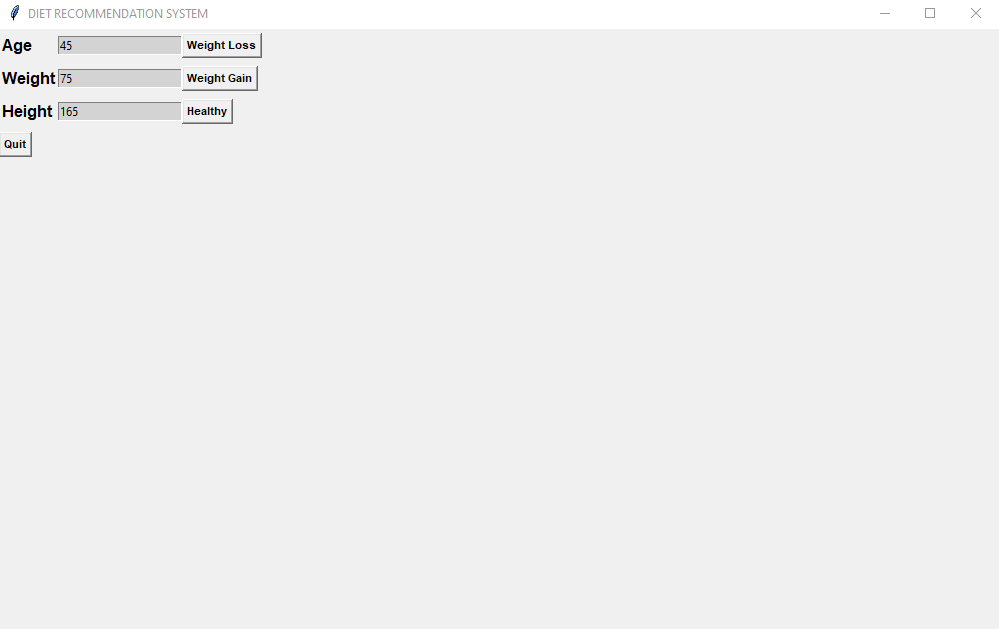

A person can consume these recommended food items for break fast alone as there will another pop up wherein 1- breakfast , 2 - lunch , 3 - dinner & I have selected 1 - breakfast

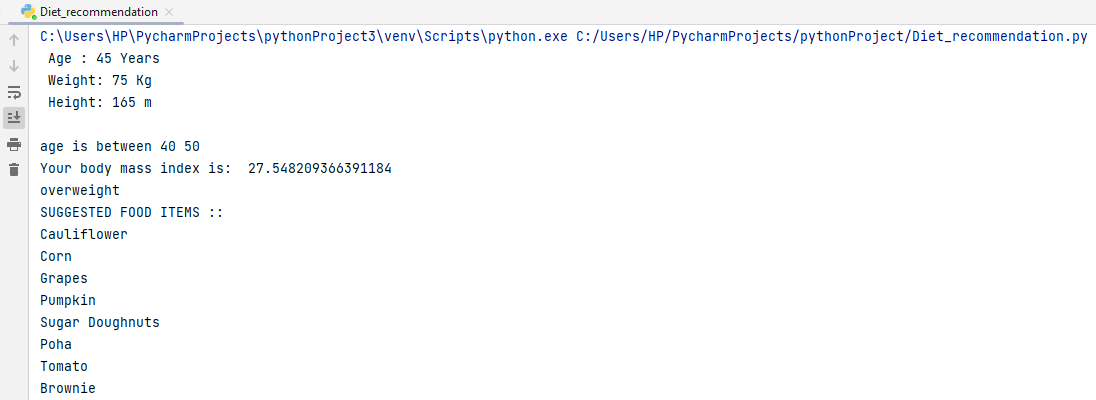

**Future Scope for personalized meal and diet recommendation system**    
Matrix factorisation methods of collaborative filtering can be applied, further Single Value Decomposition can be applied.
The module can be implemented as a cloud-based application. Packaged as a single entity, ready for production environment deployment.